In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Data preparation

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df = df.copy()

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']]

In [6]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
(df.isnull().sum())

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df = df.fillna(0)

In [9]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

In [10]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Question 1

### 1.1 What is the most frequent observation (mode) for the column ocean_proximity?

In [11]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

## Question 2

### 2.1

- Create the correlation matrix for the numerical features of your train dataset.

- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

- What are the two features that have the biggest correlation in this dataset?

In [12]:
df.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [13]:
numerical = [
            'latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            ]

categorical = ['ocean_proximity']

In [14]:
corr_matrix = df[numerical].corr()

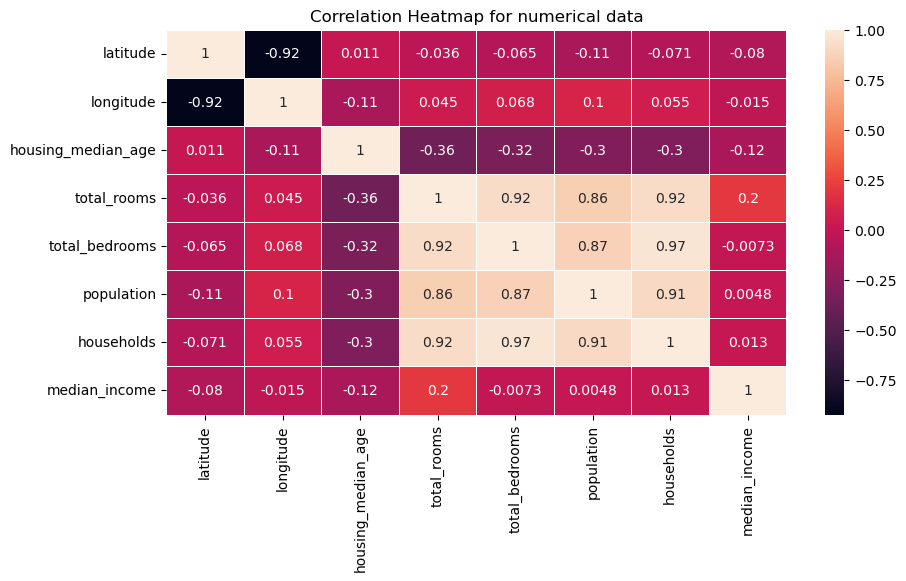

In [15]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, linewidths=.6)
plt.title('Correlation Heatmap for numerical data')
plt.show()

In [16]:
corr_matrix.unstack().sort_values(ascending = False).head(13)

latitude            latitude              1.000000
longitude           longitude             1.000000
households          households            1.000000
population          population            1.000000
total_bedrooms      total_bedrooms        1.000000
total_rooms         total_rooms           1.000000
housing_median_age  housing_median_age    1.000000
median_income       median_income         1.000000
households          total_bedrooms        0.966507
total_bedrooms      households            0.966507
total_rooms         total_bedrooms        0.920196
total_bedrooms      total_rooms           0.920196
households          total_rooms           0.918484
dtype: float64

### 2.2 Make median_house_value binary

In [17]:
avg_median_house_value = df.median_house_value.mean()

In [18]:
df['median_house_value'] = np.where(df['median_house_value'] >= avg_median_house_value, 1, 0)

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [20]:
df_train, df_val = train_test_split (df_full_train, test_size=0.25, random_state=1)

In [21]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values
y_full_train = df_full_train.median_house_value.values

## Question 3

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.

- What is the value of mutual information?

- Round it to 2 decimal digits using round(score, 2)

In [22]:
#how much we learn from the median_house_value by observing the ocean_proximity
#We can measure the degree of dependency between a categorical variable and the target variable.
round(mutual_info_score(df_train.median_house_value, df_train.ocean_proximity),2)

0.1

In [23]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
del df_full_train ['median_house_value']

## Question 4

- Now let's train a logistic regression

- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.

- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


In [24]:
dv = DictVectorizer(sparse=False)

In [34]:
train_dicts = (df_train[categorical + numerical]).to_dict(orient='records')
train_dicts

[{'ocean_proximity': 'INLAND',
  'latitude': 34.63,
  'longitude': -118.18,
  'housing_median_age': 19.0,
  'total_rooms': 3562.0,
  'total_bedrooms': 606.0,
  'population': 1677.0,
  'households': 578.0,
  'median_income': 4.1573},
 {'ocean_proximity': 'INLAND',
  'latitude': 34.69,
  'longitude': -116.9,
  'housing_median_age': 10.0,
  'total_rooms': 337.0,
  'total_bedrooms': 102.0,
  'population': 108.0,
  'households': 50.0,
  'median_income': 0.4999},
 {'ocean_proximity': 'NEAR OCEAN',
  'latitude': 33.78,
  'longitude': -118.26,
  'housing_median_age': 27.0,
  'total_rooms': 1672.0,
  'total_bedrooms': 491.0,
  'population': 1723.0,
  'households': 462.0,
  'median_income': 2.0458},
 {'ocean_proximity': 'INLAND',
  'latitude': 34.17,
  'longitude': -117.33,
  'housing_median_age': 5.0,
  'total_rooms': 4718.0,
  'total_bedrooms': 1140.0,
  'population': 2564.0,
  'households': 1056.0,
  'median_income': 2.9877},
 {'ocean_proximity': 'INLAND',
  'latitude': 35.35,
  'longitude': 

In [32]:
X_train = dv.fit_transform(train_dicts)
X_train

array([[1.70129141e-01, 5.78000000e+02, 1.90000000e+01, ...,
        6.16262976e+00, 6.06000000e+02, 3.56200000e+03],
       [3.02670623e-01, 5.00000000e+01, 1.00000000e+01, ...,
        6.74000000e+00, 1.02000000e+02, 3.37000000e+02],
       [2.93660287e-01, 4.62000000e+02, 2.70000000e+01, ...,
        3.61904762e+00, 4.91000000e+02, 1.67200000e+03],
       ...,
       [2.72781065e-01, 8.54000000e+02, 1.80000000e+01, ...,
        3.95784543e+00, 9.22000000e+02, 3.38000000e+03],
       [2.07453974e-01, 4.15000000e+02, 4.10000000e+01, ...,
        5.36626506e+00, 4.62000000e+02, 2.22700000e+03],
       [1.37631887e-01, 5.89000000e+02, 9.00000000e+00, ...,
        7.24108659e+00, 5.87000000e+02, 4.26500000e+03]])

In [31]:
val_dicts = (df_val).to_dict(orient='records')


[{'ocean_proximity': '<1H OCEAN',
  'latitude': 34.07,
  'longitude': -118.35,
  'housing_median_age': 45.0,
  'total_rooms': 7803.0,
  'total_bedrooms': 2154.0,
  'population': 3359.0,
  'households': 2041.0,
  'median_income': 3.3594},
 {'ocean_proximity': 'NEAR OCEAN',
  'latitude': 32.82,
  'longitude': -117.25,
  'housing_median_age': 23.0,
  'total_rooms': 6139.0,
  'total_bedrooms': 826.0,
  'population': 2036.0,
  'households': 807.0,
  'median_income': 9.5245},
 {'ocean_proximity': 'INLAND',
  'latitude': 40.06,
  'longitude': -121.54,
  'housing_median_age': 17.0,
  'total_rooms': 858.0,
  'total_bedrooms': 262.0,
  'population': 47.0,
  'households': 27.0,
  'median_income': 2.4028},
 {'ocean_proximity': '<1H OCEAN',
  'latitude': 33.66,
  'longitude': -117.81,
  'housing_median_age': 20.0,
  'total_rooms': 2851.0,
  'total_bedrooms': 490.0,
  'population': 1192.0,
  'households': 463.0,
  'median_income': 5.8752},
 {'ocean_proximity': 'INLAND',
  'latitude': 33.97,
  'longi

In [29]:
X_val = dv.transform(val_dicts)

In [35]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [52]:
above_avg = (model.predict_proba(X_val)[:,1]).astype(int)
above_avg

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
y_val

array([1, 1, 0, ..., 1, 1, 0])

In [54]:
round((y_val == above_avg).mean(),2)

0.58